# Analyze visually evoked responses (ERPs) 

## Set-up

#### Set path

In [1]:
# Define paths
REPO_PATH = r"C:\Users\Andre\projects\v1_v4_1024_elec" # set this
PROJECT_PATH = r'G:\Shared drives\v1_v4_1024'


#### Imports

In [2]:
# general
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import odml
from scipy.signal import find_peaks, peak_widths

# custom
import sys
sys.path.append(REPO_PATH)
from scripts.plots import plot_schematic

#### Settings

In [3]:
# Session of interest (will ultimately apply to all sessions)
SESSIONS = ["A_SNR_140819", "L_SNR_250717"]
SESSION = "A_SNR_140819"

# Dataset details
FS = 500 # sampling frequency
N_CHANS = 64

# global variables
T_MIN = -300
STIM_DURATOIN = 400

#### Functions

## Main

#### Create output directory

In [4]:
dir_out = f"{PROJECT_PATH}/figures/erp"
if not os.path.exists(dir_out):
    os.makedirs(dir_out)

#### load data

In [5]:
# load example LFP epochs
dir_input = fr"G:\Shared drives\v1_v4_1024\data\lfp\lfp_epochs\{SESSION}"
fname_in = fr"{dir_input}\NSP1_array1_LFP.npy"
lfp = np.load(fname_in)
print(f"LFP Shape: \t{lfp.shape} (trials x channels x samples)")

LFP Shape: 	(170, 64, 500) (trials x channels x samples)


In [6]:
# load metadata for example sessions
odml_path = fr"{PROJECT_PATH}\data\dataset\{SESSION}\metadata_{SESSION}.odml"
metadata = odml.load(odml_path)

warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> inside <odML> tag
 (line 5)
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> in odML document section <odML>  (line 5)
Validation found 0 errors and 1 warnings in 0 Sections and 1 Properties.


### Compute ERP

In [7]:
# average over trials
erp = np.mean(lfp, axis=0)
print(f"ERP Shape: \t{erp.shape} (channels x samples)")

ERP Shape: 	(64, 500) (channels x samples)


### Plot ERP

Text(0, 0.5, 'Voltage (uV)')

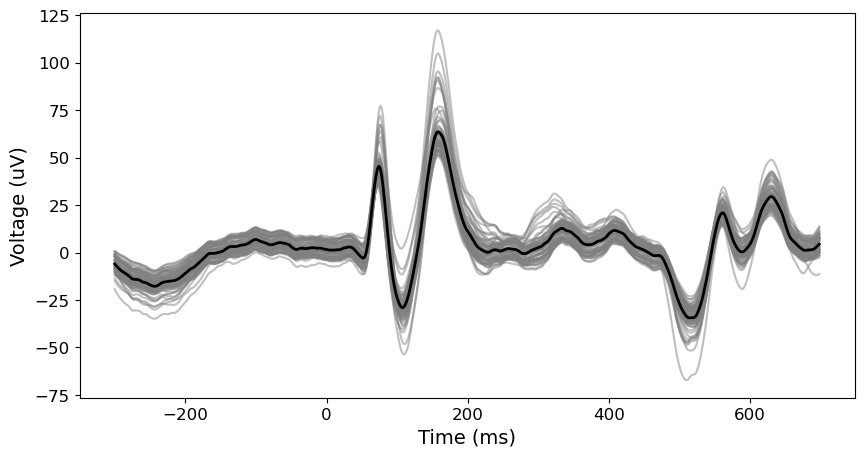

In [8]:

# init time-vector
time = np.arange(-0.3, 0.7, 1/FS) * 1000

# plot erp
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(time, erp.T, color='grey', alpha=0.5) # plot each channel 
ax.plot(time, np.mean(erp, axis=0), color='k', linewidth=2) # plot average across channels

ax.set_xlabel("Time (ms)")
ax.set_ylabel("Voltage (uV)")

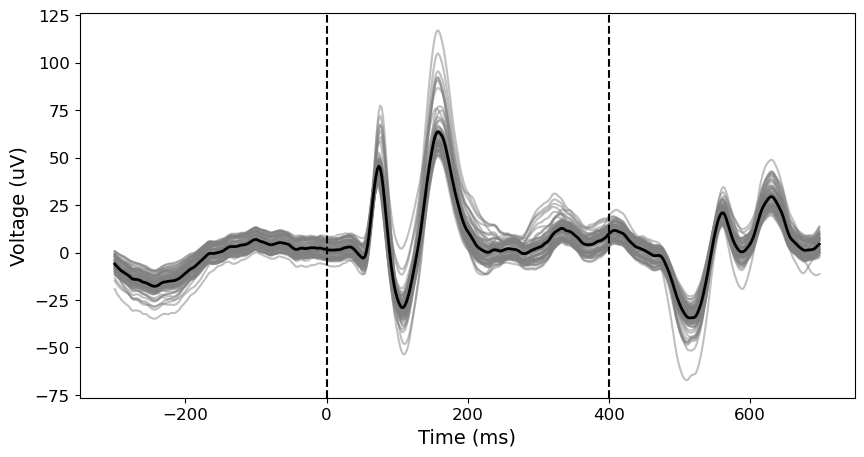

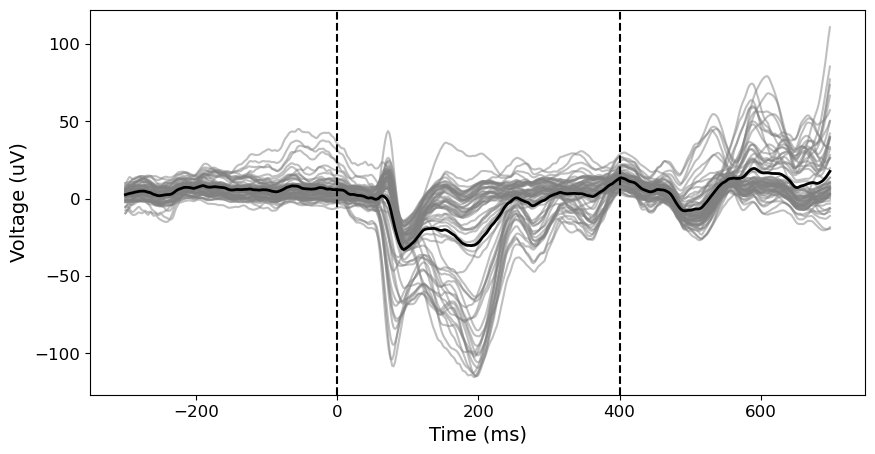

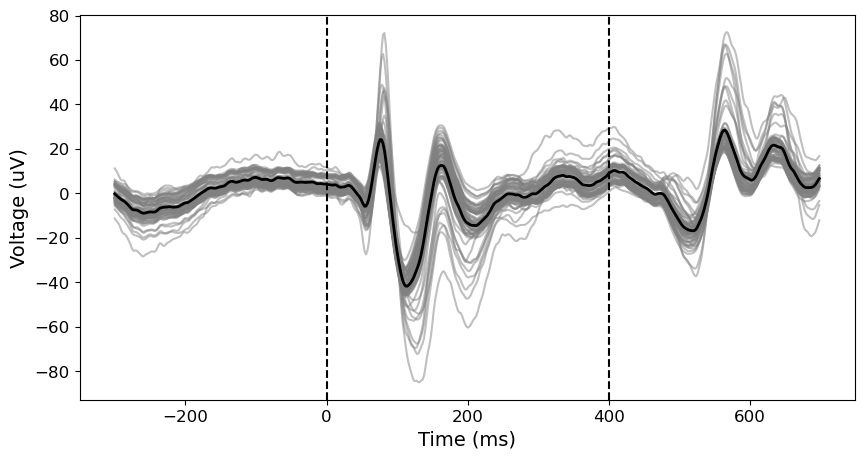

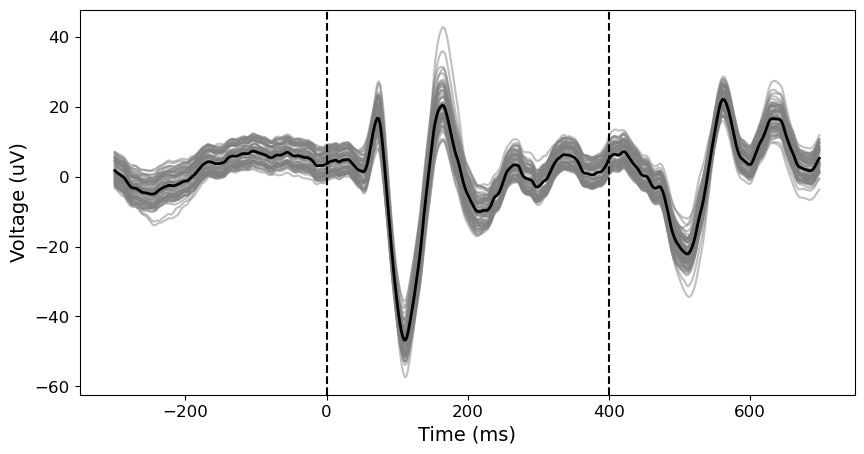

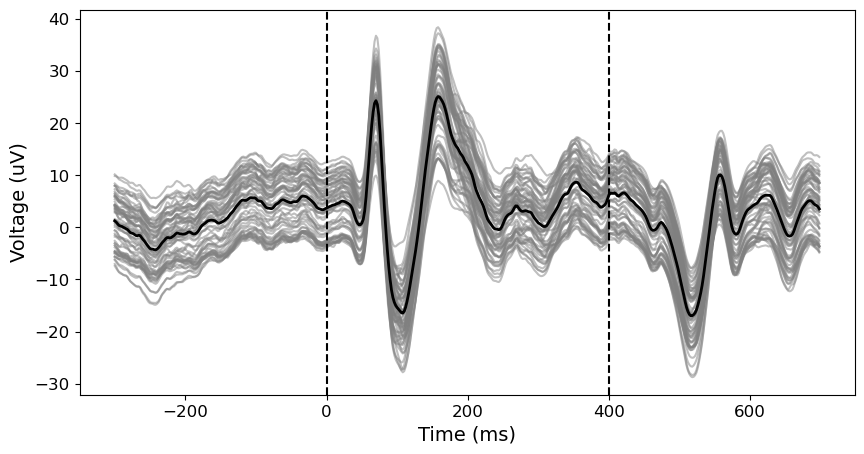

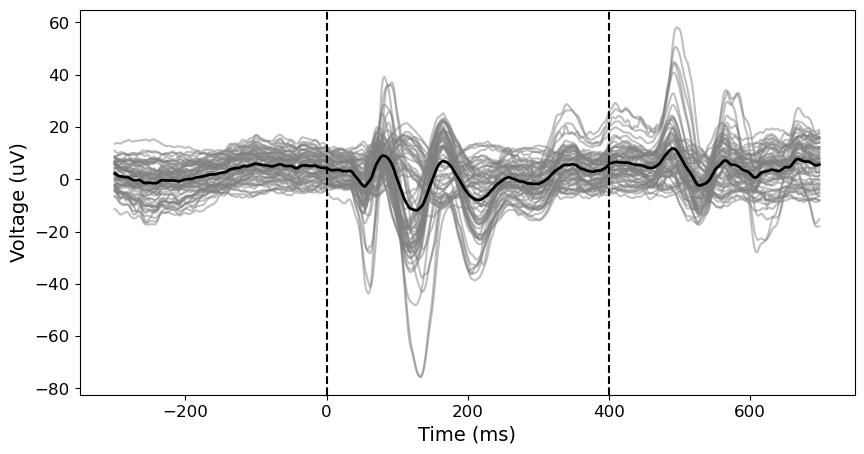

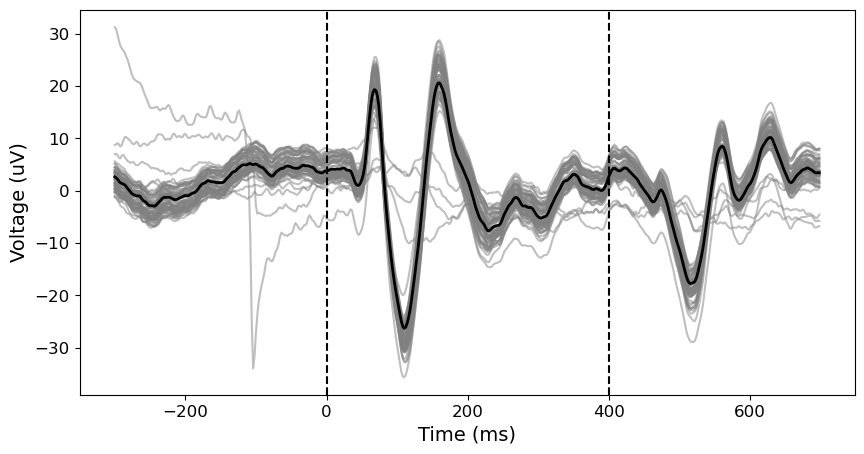

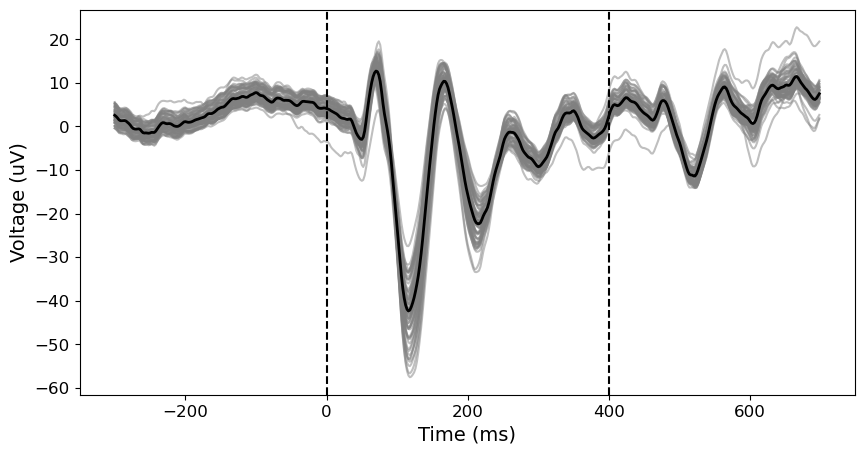

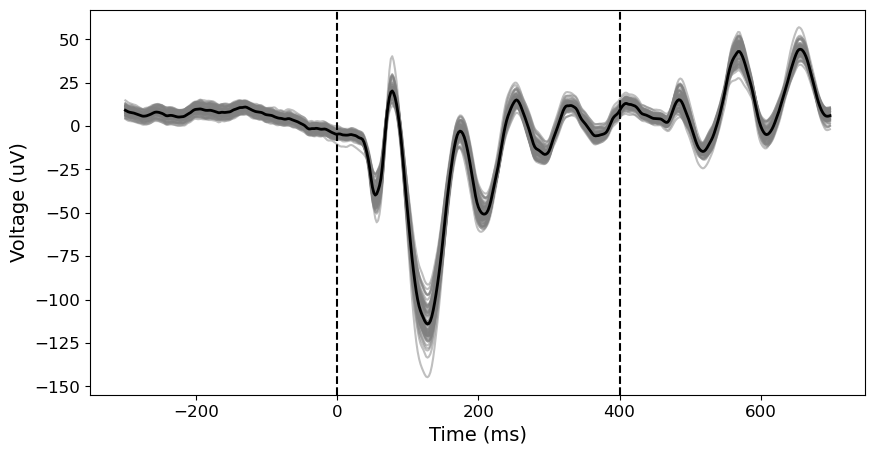

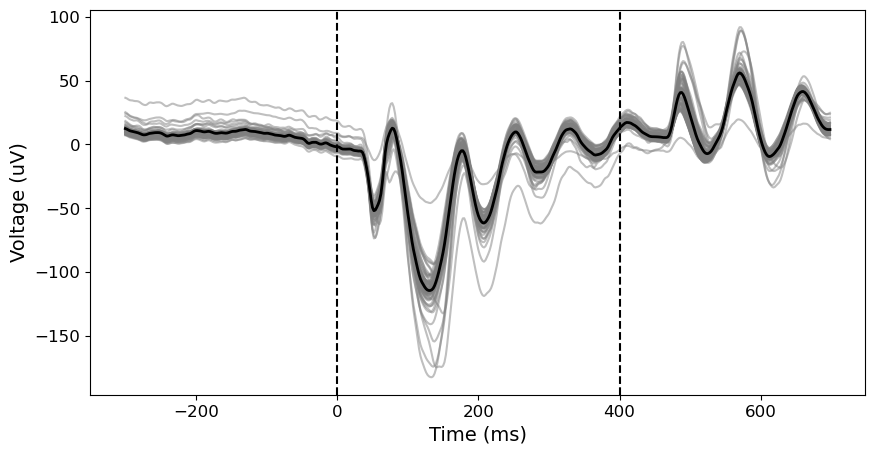

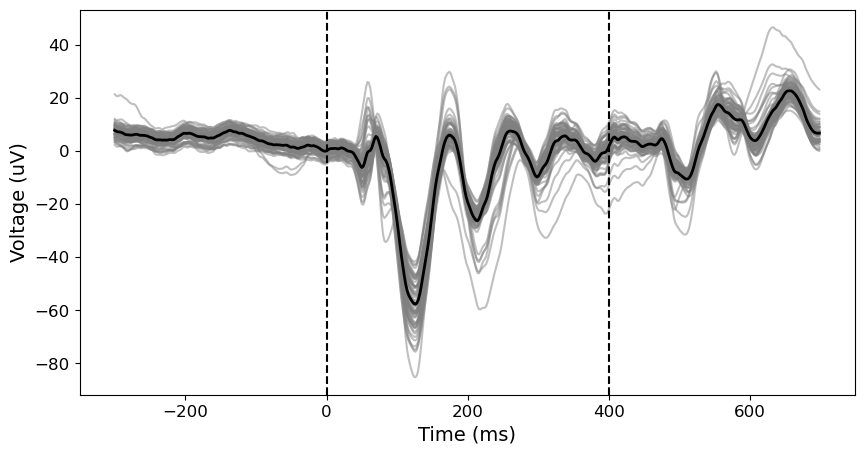

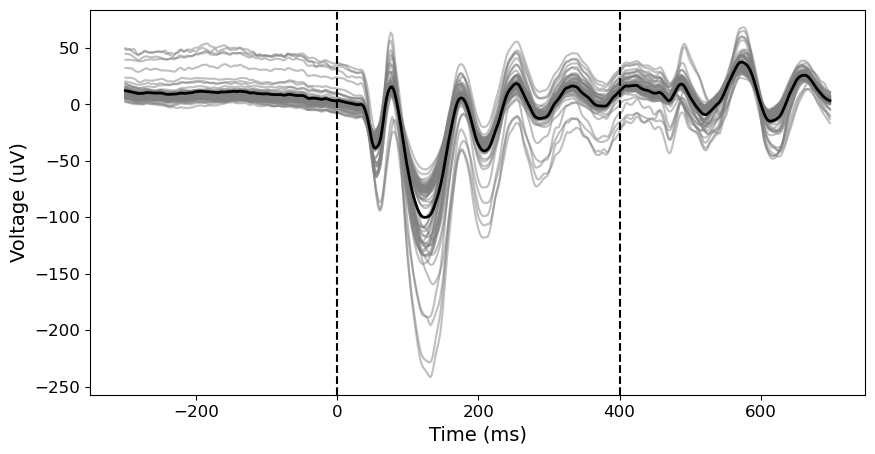

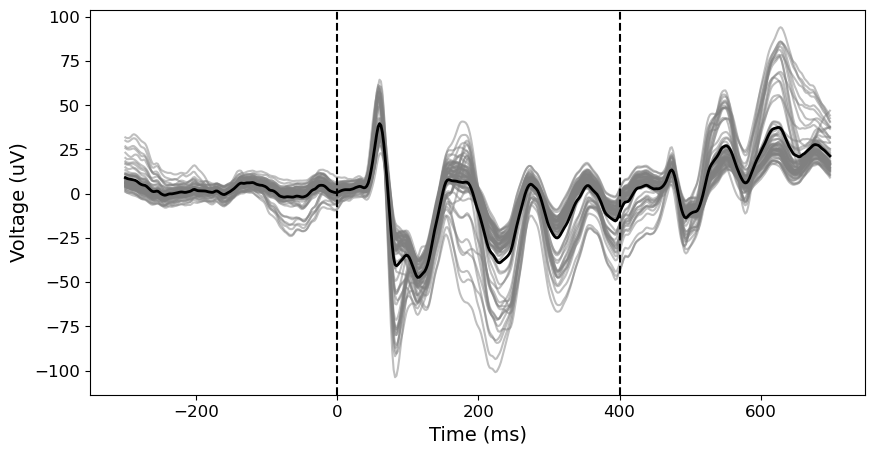

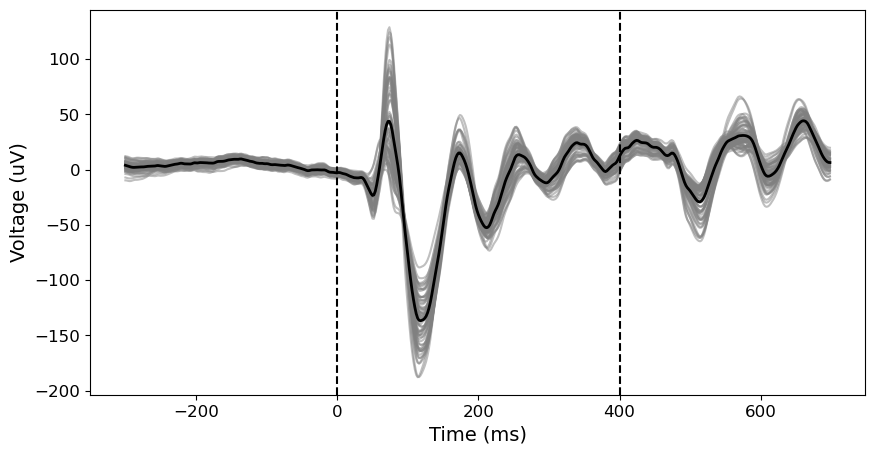

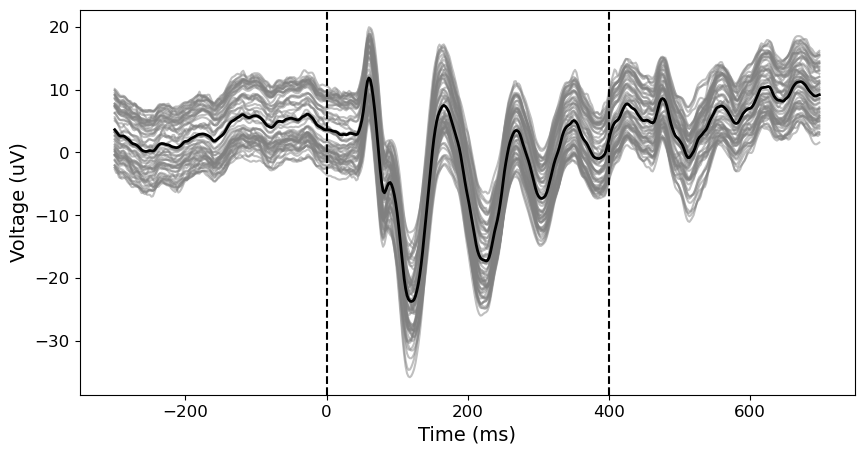

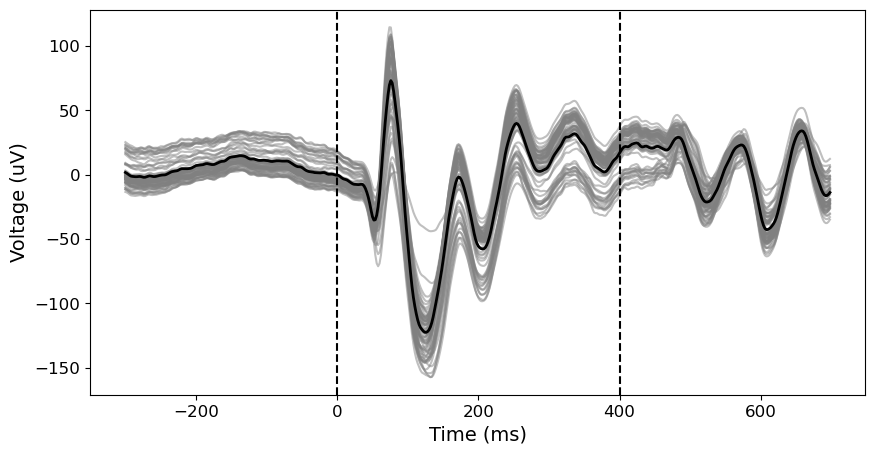

In [9]:
# plotting for each array in a session
dir_input = fr"G:\Shared drives\v1_v4_1024\data\lfp\lfp_epochs\{SESSION}"
idx_nsp = 1
N_ARRAYS = 16


for i_array in range(1, N_ARRAYS+1):
    fname_in = fr"{dir_input}\NSP{idx_nsp}_array{i_array}_LFP.npy"
    lfp = np.load(fname_in)

    erp = np.mean(lfp, axis=0)

    time = np.arange(-0.3, 0.7, 1/FS) * 1000 # init time-vector

    # plot
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(time, erp.T, color='grey', alpha=0.5)
    ax.plot(time, np.mean(erp, axis=0), color='k', linewidth=2) # plot average across channels
    
    ax.set_xlabel("Time (ms)")
    ax.set_ylabel("Voltage (uV)")

    ax.axvline(0, color='k', linestyle='--')
    ax.axvline(400, color='k', linestyle='--')

    #fig.savefig(fr"C:\Users\Andre\Pictures\NSP{idx_nsp}_array{i_array}_LFP.png")

    # increment
    if i_array % 2 == 0:
        idx_nsp += 1


In [10]:
# plotting the mean for each array in a session
dir_input = fr"G:\Shared drives\v1_v4_1024\data\lfp\lfp_epochs\{SESSION}"
idx_nsp = 1
N_ARRAYS = 16
N_SAMPLES = 500 

# create empty array for erp mean
erps= np.zeros([N_ARRAYS,N_CHANS, N_SAMPLES])

# init time-vector
time = np.arange(-0.3, 0.7, 1/FS) * 1000

for i_array in range(1, N_ARRAYS):
    fname_in = fr"{dir_input}\NSP{idx_nsp}_array{i_array}_LFP.npy"
    lfp = np.load(fname_in)

    erp = np.mean(lfp, axis=0)

    erps[i_array-1] = erp

    # increment
    if i_array % 2 == 0:
        idx_nsp += 1

erp_array = np.mean(erps, axis=1)
erp_array.shape

(16, 500)

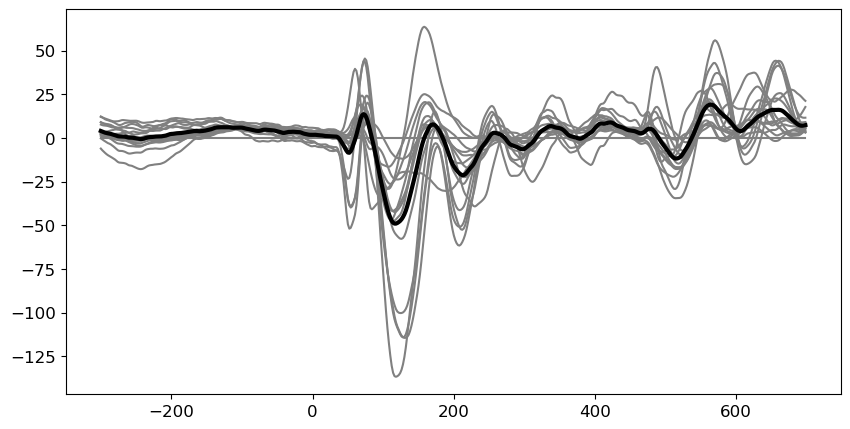

In [11]:
# plot mean of all arrays
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(time, erp_array.T, color='grey')
ax.plot(time, np.mean(erp_array, axis=0), color='k', linewidth=3);

In [12]:
# save mean of all arrays together
allarrays_mean = np.mean(erp_array, axis=0)

In [13]:
# find height param for peaks
mean = np.mean(allarrays_mean)
std = np.std(allarrays_mean)
height = mean + (std)
height

12.157693530927654

array([13.67686924, 19.13321631, 16.16373973])

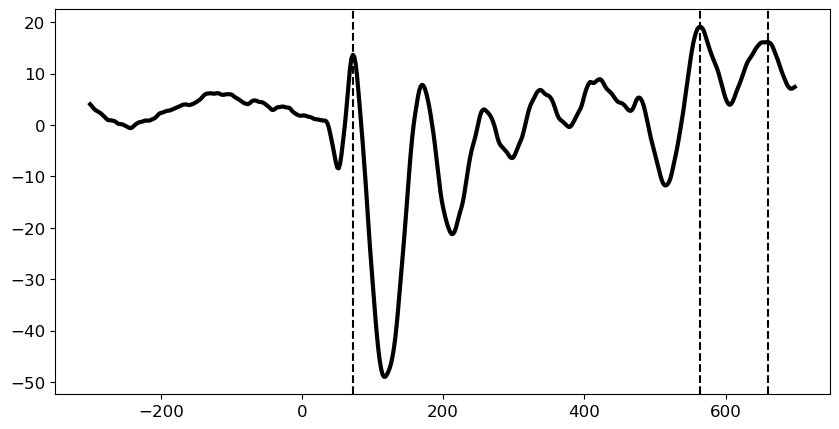

In [14]:
peaks_pos, properties_pos = find_peaks(allarrays_mean, height=height, distance = 10)
peaks_pos

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(time, allarrays_mean, color='k', linewidth=3)
for value in peaks_pos:
    ax.axvline(time[value], color='k', linestyle='--')

peak_posamp = allarrays_mean[peaks_pos]
peak_posamp

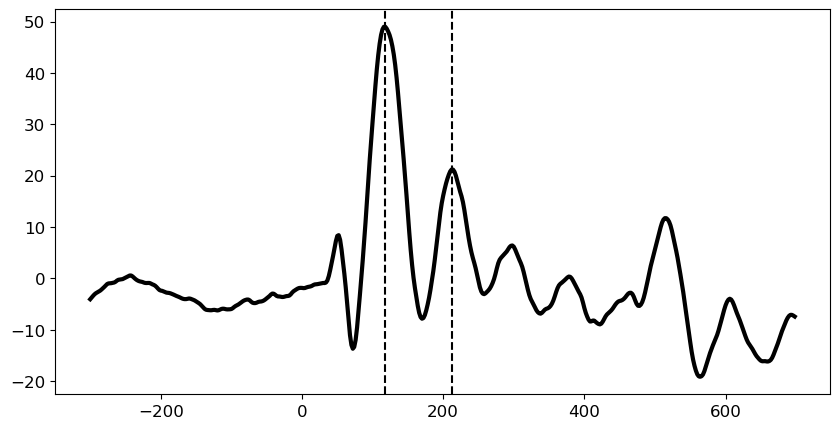

In [15]:
peaks_neg, properties_neg = find_peaks(-allarrays_mean, height=height, distance = 10)
peaks_neg

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(time, -allarrays_mean, color='k', linewidth=3)
for value in peaks_neg:
    ax.axvline(time[value], color='k', linestyle='--')

peak_negamp=allarrays_mean[peaks_neg]

array([13.67686924, 19.13321631, 16.16373973])

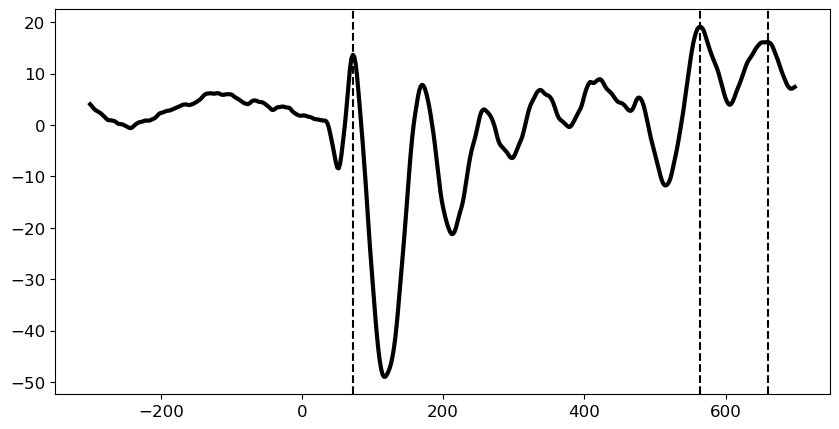

In [16]:

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(time, allarrays_mean, color='k', linewidth=3)
for value in peaks_pos:
    ax.axvline(time[value], color='k', linestyle='--')

peak_posamp = allarrays_mean[peaks_pos]
peak_posamp

### Quantify ERP 

In [17]:
# define function to define ERP params (latency, amplitude, width) for grand-average ERP

def comp_erp_params(erp, distance = 10, tresh = 1):

    # find height param for peaks
    mean = np.mean(erp)
    std = np.std(erp)
    height = mean + (std * tresh) 
    

    # init
    params = pd.DataFrame()

    # use scipy.find_peaks to find parameters
    peaks_pos, _ = find_peaks(erp, height=height, distance=distance) 
    peaks_neg, _ = find_peaks(-erp, height=height, distance=distance)

    peaks = np.sort(np.concatenate([peaks_pos, peaks_neg]))
    order = np.argsort(np.concatenate([peaks_pos, peaks_neg])) #use to sort widths
    params['latency'] = peaks
    
    # amplitude
    params['amp'] = erp[peaks]

    # find peaks width
    widths_pos, _, _, _ = peak_widths(erp, peaks_pos)
    widths_neg, _, _, _ = peak_widths(-erp, peaks_neg)
    widths = np.concatenate([widths_pos, widths_neg])
    params['width'] = widths[order]

    return params

    


In [50]:
def crop_erp(erp, time, t_window):
    mask = (time>=t_window[0]) & (time<=t_window[1])

    return erp[mask], time[mask]

In [80]:
T_MIN = -300
STIM_DURATOIN = 400
print(allarrays_mean.shape)

erp_crop, time_crop = crop_erp(allarrays_mean, time, [T_MIN, STIM_DURATOIN])
print(erp_crop.shape)

(500,)
(200,)


In [82]:
# compute for each channel
mean_params = comp_erp_params(erp_crop)
mean_params['latency'] = mean_params['latency']

In [83]:
mean_params.head()

,latency,amp,width
0,26,-8.423566,7.832902
1,36,13.676869,9.924793
2,59,-48.973830,25.442230
3,106,-21.202014,22.952239


In [20]:
# plot schematic of ERP params


### Repeat across subjects

In [76]:
# create a dataframe with a column for the session, array, and each param
N_ARRAYS = 16
allsessions_list = []

for session in SESSIONS:
    idx_nsp = 1
    df_arraylist = []
    for i_array in range(1, N_ARRAYS+1):
        # create dataframe
        fname_in = fr"G:\Shared drives\v1_v4_1024\data\lfp\lfp_epochs\{session}\NSP{idx_nsp}_array{i_array}_LFP.npy"
        lfp = np.load(fname_in)

        erp = np.mean(lfp, axis=0)

        for channel in range(erp.shape[0]):
            erp_crop, time_crop = crop_erp(erp[channel], time, [T_MIN, STIM_DURATOIN])
            
            df_array = comp_erp_params(erp_crop)
            df_array['latency'] = df_array['latency']

            # add session, channel and array
            df_array['session'] = session
            df_array['channel'] = channel
            df_array['array'] = i_array

            df_array['amp_abs'] = np.abs(df_array['amp'])
            
            allsessions_list.append(df_array)

        # increment
        if i_array % 2 == 0:
            idx_nsp += 1



df_allsessions = pd.concat(allsessions_list)
df_allsessions.reset_index(inplace = True)
df_allsessions.rename(columns={'index':'peak_index'}, inplace=True)
df_allsessions = df_allsessions.loc[: , ['session','channel','array','peak_index', 'latency', 'amp','amp_abs', 'width']]
df_allsessions.to_csv(fr'G:\Shared drives\v1_v4_1024\data\results\allsessions_erp_params_df.csv')
    


In [77]:
df_allsessions['latency'].max()

347

In [78]:
df_max = df_allsessions.groupby(by=['session', 'array', 'channel']).apply(np.max, axis = 0)
df_max.to_csv(fr'G:\Shared drives\v1_v4_1024\data\results\max_erp_params_df.csv')


In [79]:
df_max

session  channel  array  peak_index  latency  \
session      array channel                                                      
A_SNR_140819 1     0        A_SNR_140819        0      1           3      229   
                   1        A_SNR_140819        1      1           2      228   
                   2        A_SNR_140819        2      1           5      228   
                   3        A_SNR_140819        3      1           3      228   
                   4        A_SNR_140819        4      1           2      228   
...                                  ...      ...    ...         ...      ...   
L_SNR_250717 16    59       L_SNR_250717       59     16           6      314   
                   60       L_SNR_250717       60     16           4      281   
                   61       L_SNR_250717       61     16           4      281   
                   62       L_SNR_250717       62     16           6      296   
                   63       L_SNR_250717       63     16           7      279   

                                   amp     amp_abs      width  
session      array channel                                     
A_SNR_140819 1     0         65.528083   65.528083  35.027186  
                   1         66.172736   66.172736  22.755828  
                   2         54.551556   54.551556  37.283867  
                   3         56.616983   56.616983  36.523619  
                   4         63.665214   63.665214  22.758948  
...                                ...         ...        ...  
L_SNR_250717 16    59       159.296016  159.296016  53.653837  
                   60       169.573607  169.573607  24.018671  
                   61       192.865965  192.865965  85.693658  
                   62       184.207147  184.207147  29.259395  
                   63       138.268218  138.268218  32.829243  

[2048 rows x 8 columns]

warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> inside <odML> tag
 (line 5)
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> in odML document section <odML>  (line 5)
Validation found 0 errors and 1 warnings in 0 Sections and 1 Properties.


KeyboardInterrupt: 

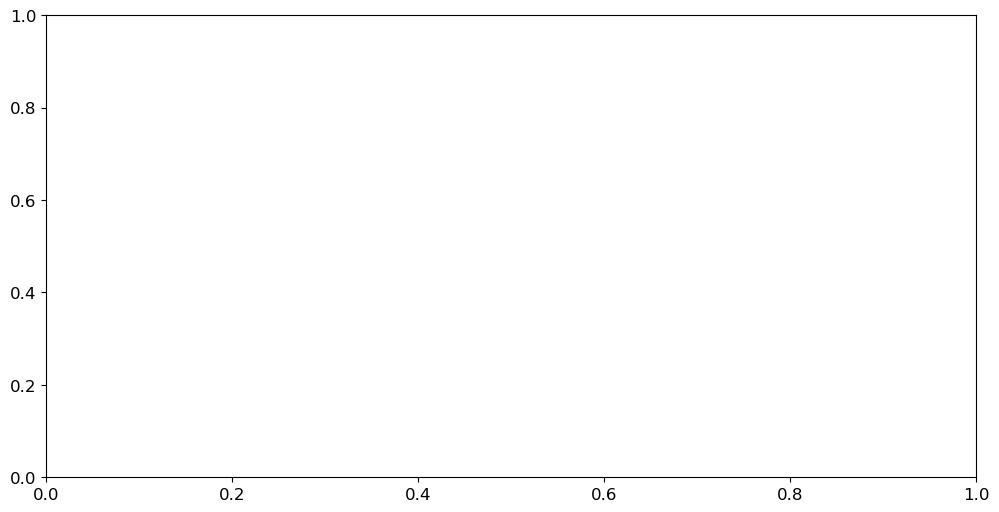

In [24]:
dir_figs = fr"G:\Shared drives\v1_v4_1024\figures\erp\amp_schematic"

for session in SESSIONS:
    # schematic for amp
    fig, ax =plot_schematic(df_max.loc[session, 'amp'], fr"{PROJECT_PATH}\data\dataset\{session}\metadata_{session}.odml", title = f"session: {session}", label = "max amplitude", fname_out= f"{dir_figs}/amp_{session}.png")

    # schematic for amp_abs
    fig, ax =plot_schematic(df_max.loc[session, 'amp_abs'], fr"{PROJECT_PATH}\data\dataset\{session}\metadata_{session}.odml", title = f"session: {session}", label = "max abs amplitude", fname_out= f"{dir_figs}/amp_abs_{session}.png")
    

### Repeat process for latency (lowest)


In [ ]:
df_allsessions['latency_sec'] = df_allsessions['latency'] / FS

# groupby min
df_min = df_allsessions.groupby(by=['session', 'array', 'channel']).apply(np.min, axis = 0)

warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> inside <odML> tag
 (line 5)
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> in odML document section <odML>  (line 5)
Validation found 0 errors and 1 warnings in 0 Sections and 1 Properties.
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> inside <odML> tag
 (line 5)
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> in odML document section <odML>  (line 5)


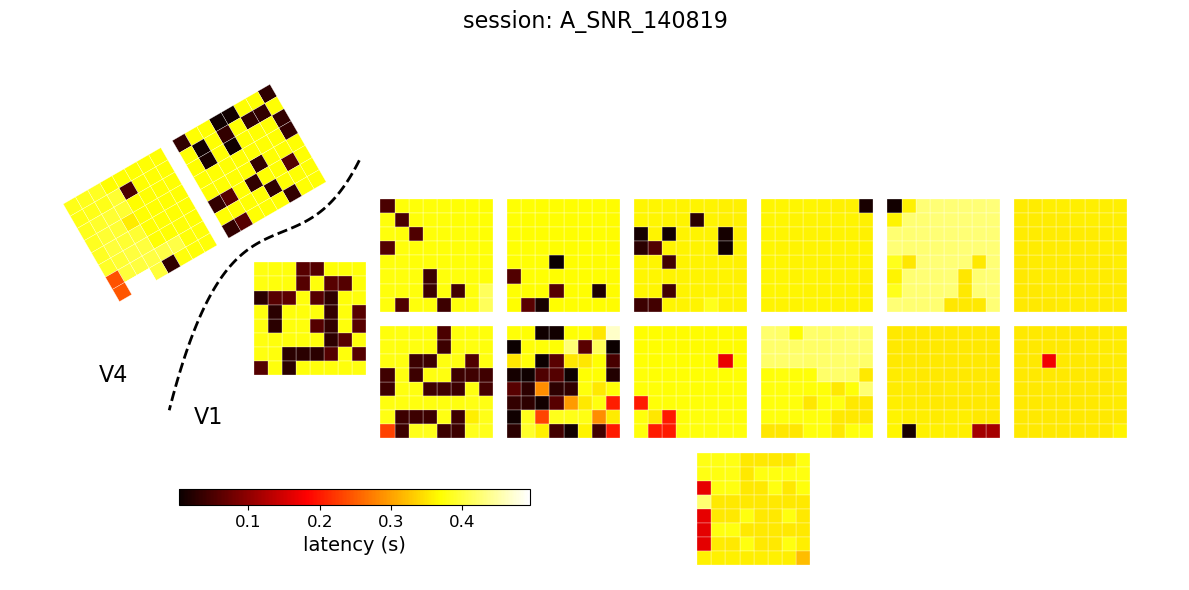

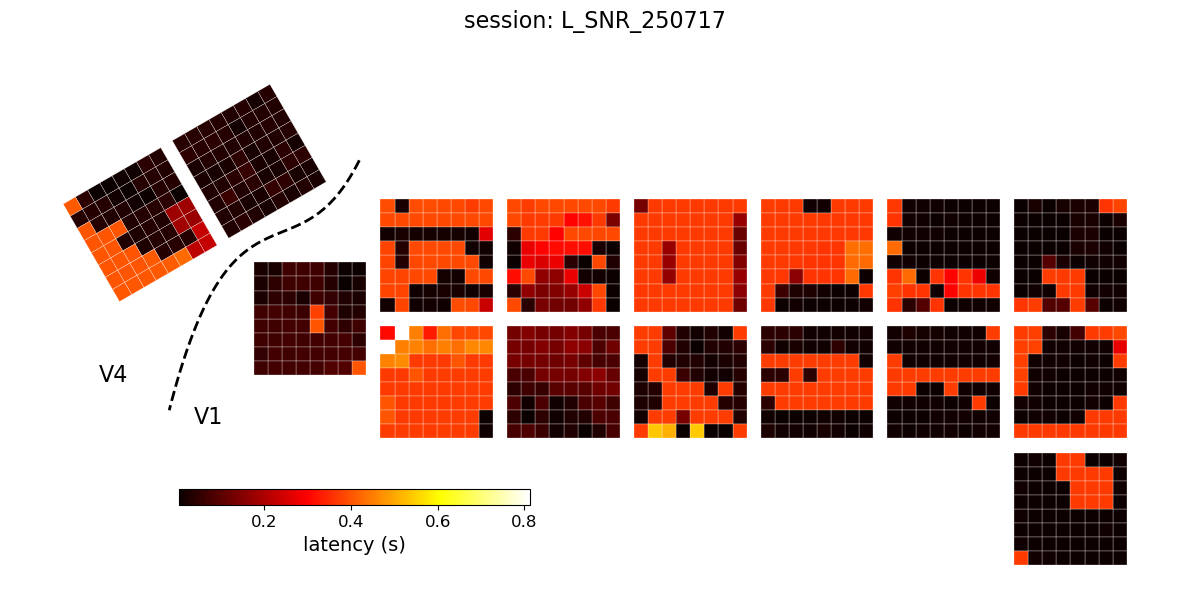

In [ ]:
dir_figs = fr"G:\Shared drives\v1_v4_1024\figures\erp\latency_schematic"

for session in SESSIONS:
    # schematic for latency
    fig, ax =plot_schematic(df_min.loc[session, 'latency_sec'], fr"{PROJECT_PATH}\data\dataset\{session}\metadata_{session}.odml", title = f"session: {session}", label = "latency (s)", fname_out= f"{dir_figs}/latency_{session}.png")
